# Project Foundations for Data Science: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# mount google drive to get access to the data on drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [ ]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# returns the last 5 rows
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The data has 9 columns. Each row corresponds to the order placed by a customer. Some of the values in column 'rating' are marked as 'Not given'

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# check number of rows and columns.
df.shape

(1898, 9)

#### Observations:

The data has 9 columns and 1898 rows.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# print DataFrame summary to infer different columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

As seen from the report, there are following datatypes:

* 1 column is of data type float64
* 4 columns are of data type int64
* 4 columns are of data type object4

No missing values. (1898 Non null values for each column, as number of total rows count)

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# function to calculate missing values percentage
get_missing = lambda x: (x.isna().sum()/x.shape[0])*100

In [ ]:
# checking missing values percentage
get_missing(df)

order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

#### Observations:

* There are no missing values
* However some of the values in 'rating' column are mentioned as 'Not given'


Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# summary for numeric values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# summary for non numeric values
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [ ]:
# check for duplicates
df.duplicated().sum()

0

#### Observations:

The data summary on the "food_preparation_time" suggests that the food preparation time is as folowing:

* maximum time is 35
* minimum time is 20
* avarage time is 27

Other observations:
* There are 178 unique restorants
* There are 14 types of unique cuisine types
* Most popular quisin is American
* Most of the orders are placed on Weekends
* Some of the ratings are Not given
* No duplicates in the data

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# printing the count of unique categorical levels in "rating" column
df["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
# printing the percentage of unique categorical levels in "rating" column
df["rating"].value_counts(normalize=True)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

#### Observations:

*   There are 736 not rated orders
*   38% orders are marked as 'Not given', it would be interesting to find out what's the best way to treat them.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.)

In [ ]:
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# helper function for visualization and analizing the numerical variables
def histogram_boxplot(feature, figsize=(15, 10), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (15, 10))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

**Let's check the distribution for numerical columns:**

Numerical variables analysis:
* cost_of_the_order
* food_preparation_time
* delivery_time

Observations on **Cost**

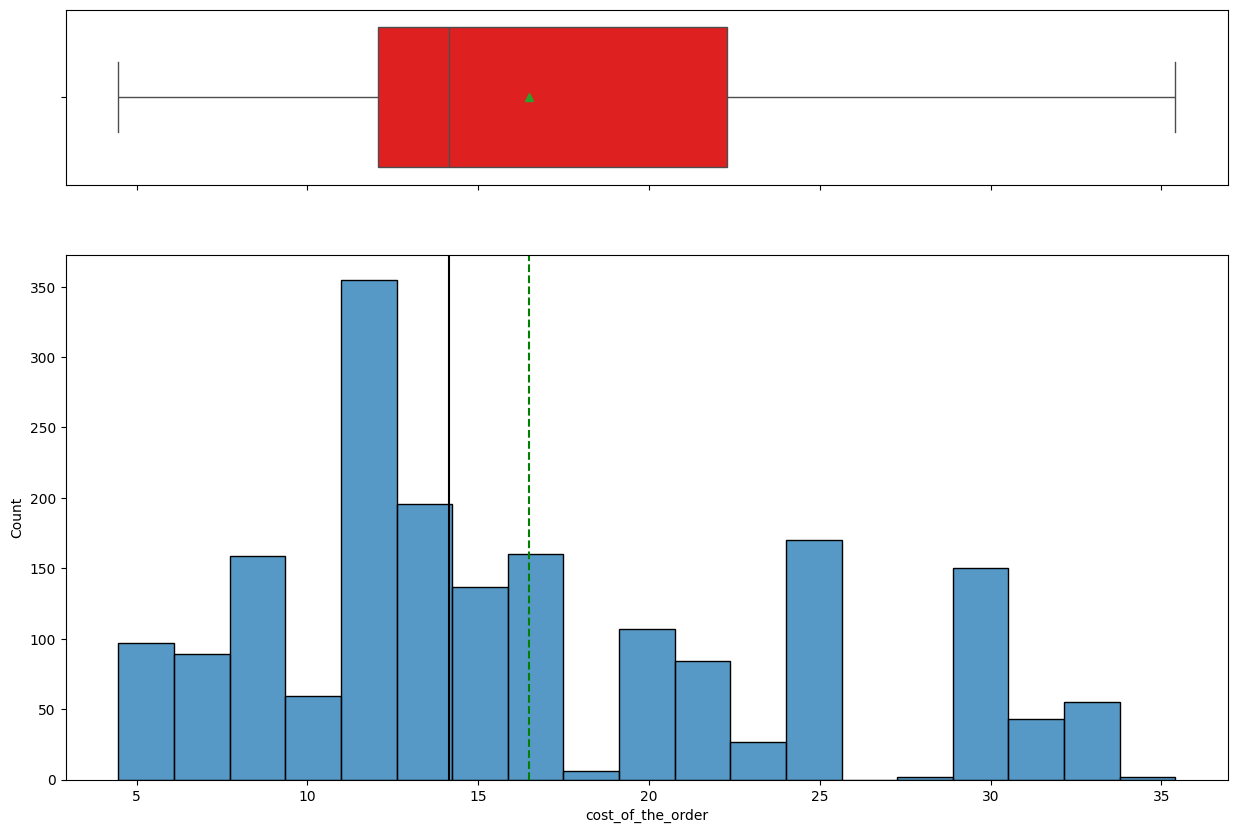

In [ ]:
# analyzing the cost variable
histogram_boxplot(df.cost_of_the_order)

Observations:

* The distribution of order prices is right-skewed (there are fewer orders with high prices compared to low-price orders).
* The majority of order prices is close to 14.
* Median price is equal ~ 14.5, but the Mean is ~16.5.
* There are no outliers.
* It wolud be interesting to test correlation between price and
  * delivery time
  * type of quisine
  * day of week
  * prep time
* Consider to split the cost into bins Hight, Medium, Low

Observations on **Food preparation time**

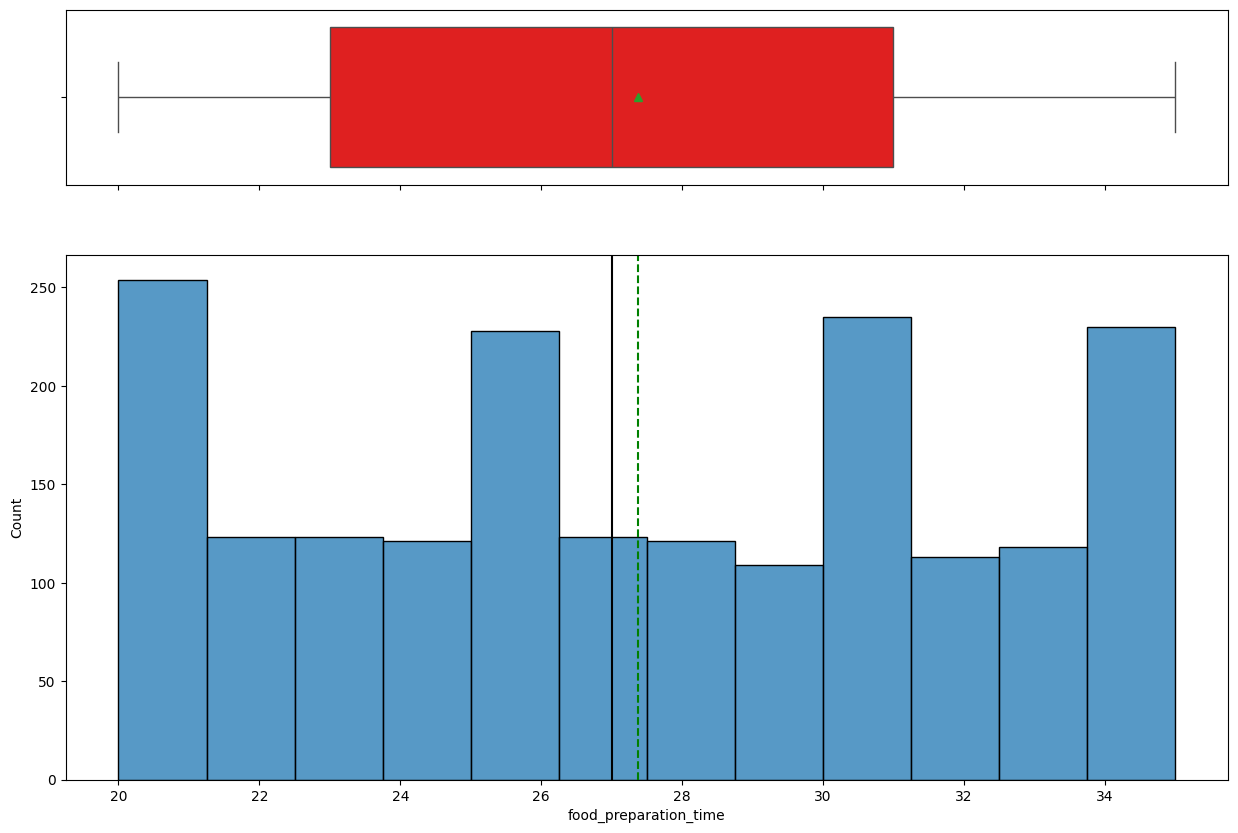

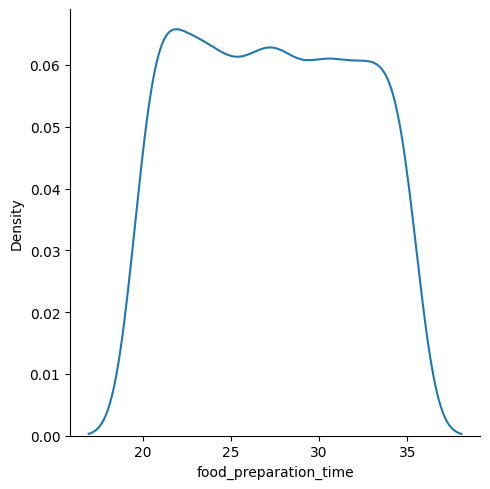

In [ ]:
# analyzing the Food preparation time variable
histogram_boxplot(df.food_preparation_time)
sns.displot(data=df,x=df.food_preparation_time,kind='kde')
plt.show()

Observations:

* The distribution is not skewed (not significantly).
* There are no outliers.
* The majority of the of the food preparation time values are uniformly distributed.
* There are high peaks in food preparation time also uniforemly distributed.
* It would be inerested to find what causes the peaks in the preparation time.
* It wolud be interesting to test correlation between preparation time and type of cuisine

Observations on **Delivery time**

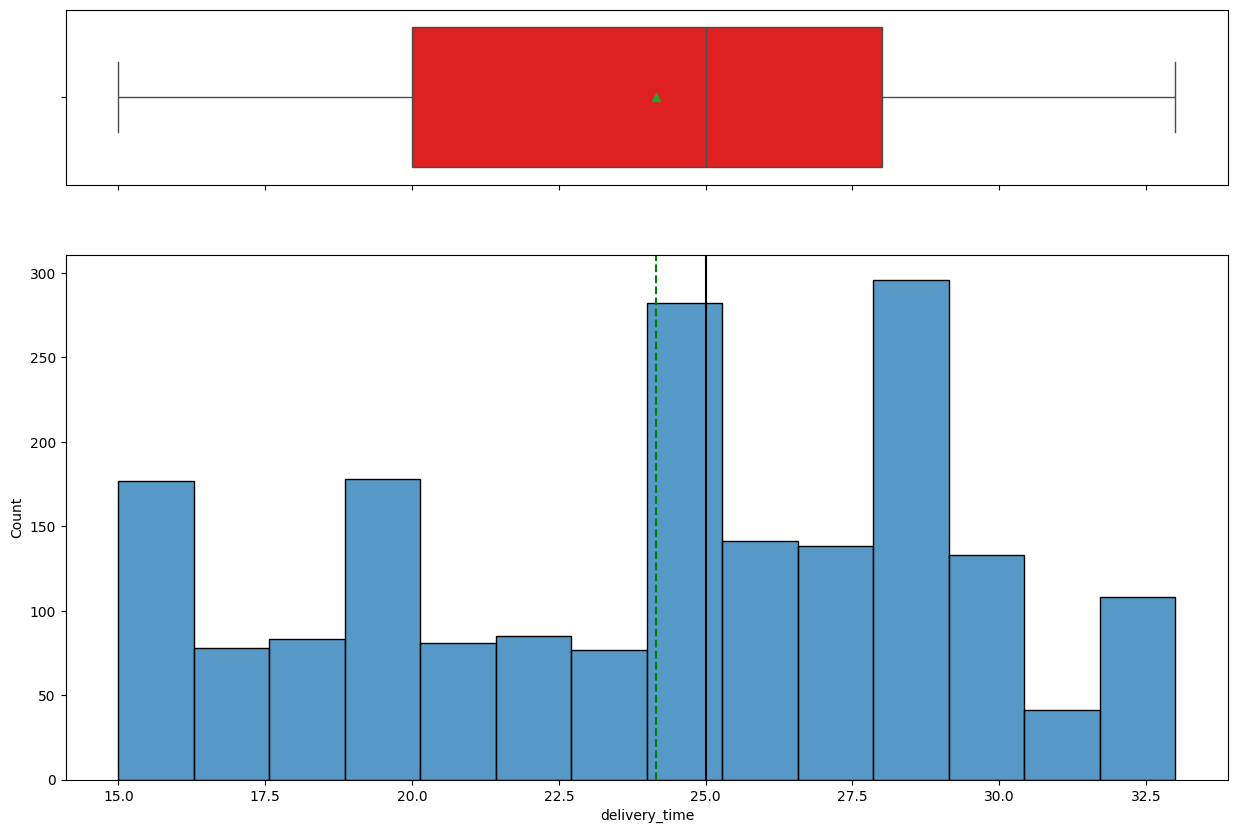

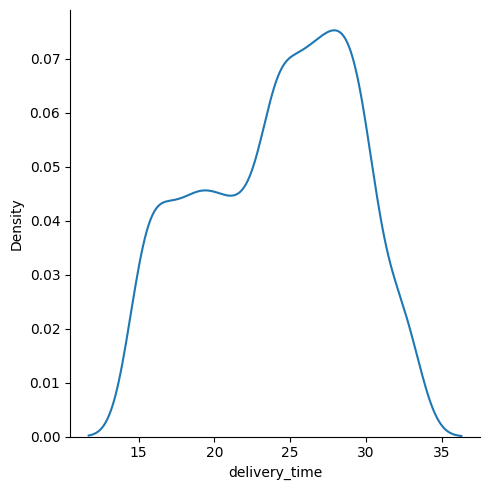

In [ ]:
# analyzing the Delivery time variable
histogram_boxplot(df.delivery_time)
sns.displot(data=df,x=df.delivery_time,kind='kde')
plt.show()

**Observations:**
* The distribution of order prices is left-skewed (there are fewer orders with short delivery times compared to long delivery time).
* The majority of order prices is close to 24.
* Median price is equal ~ 24, but the Mean is ~25.
* There are no outliers.
* It wolud be interesting to test correlation delivery time and rating.
* It would be interesting to find what causes the hight peacks in delivery time.



---



**Let's check the distribution for categorical columns.**

Categorical variables analysis:

* cuisine_type
* day_of_the_week
* rating

In [ ]:
# helper function for visualization and analizing the categorical variables
def bar_perc(data, z, size_x = 15, size_y = 8):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (size_x, size_y))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, hue =z, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y + 10), size = 10)                  # Annotate the percentage

    plt.show()

Observations on **Day of the week**

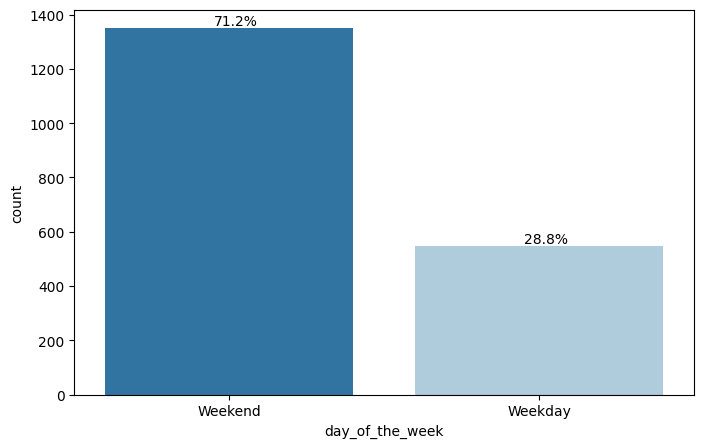

In [ ]:
# analyzing the day of the week variable
bar_perc(df,'day_of_the_week',8,5)

### Observations:

* Most of the orders are during the weekend
* It would be interesting to test the correlation between day of the week and features like:
  * cuisine type
  * price
  * rating

Observations on **Cuisin type**

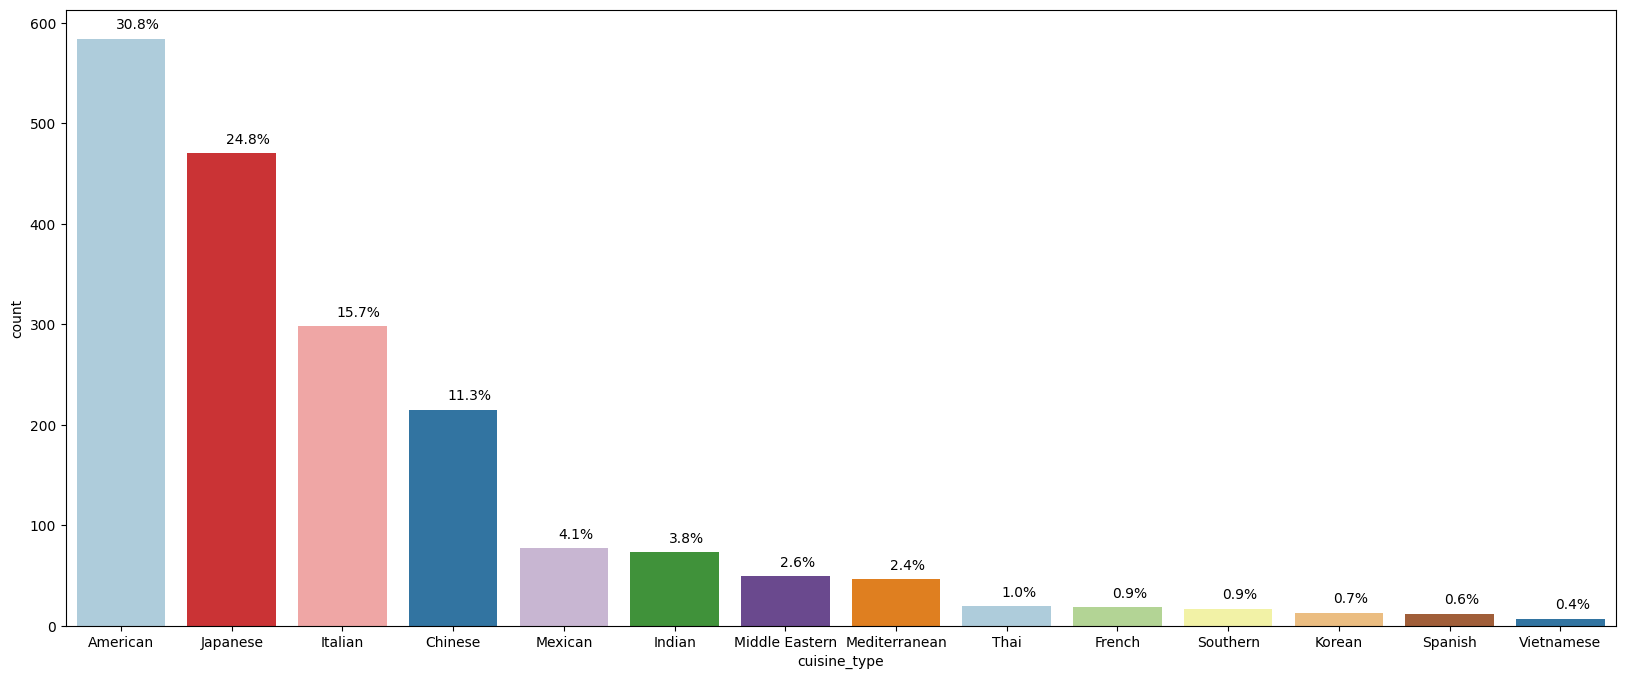

In [ ]:
# analyzing the cuisine type variable
bar_perc(df,'cuisine_type',20)

### Observations:

* Most of the orders are for the following cuisines:
  * American
  * Japanese
  * Italian
  * Chinese
* The following cuisines have a very small number of orders:
  * Vietnamese
  * Korean
  * French
  * Southern
  * Thai
* It would be interesting to try and distribute the cuisins with small number of orders among other cuisins. The representation of this quisins is very small to learn from it.
* Consider to treat (drop) insignificant restorant data.

Observations on **Rating**

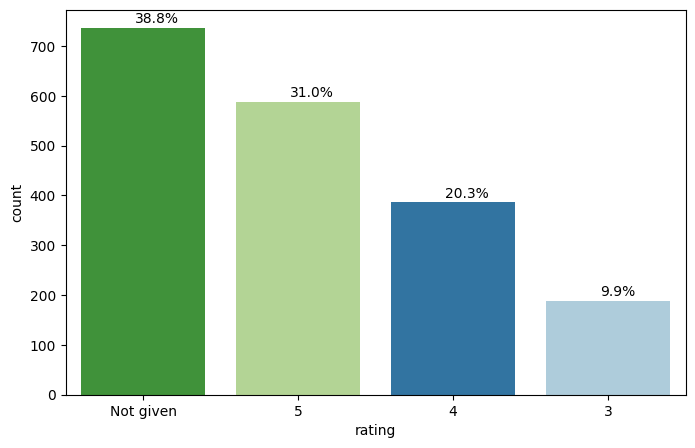

In [ ]:
# analyzing the rating variable
bar_perc(df,'rating',8,5)

### Observations:

* Most of the ratings are Not given (38%)
  * It's a big chunk of data and probably should be treated.
* Among the ratings that are known, 5 is the most common.
* It would be interesting to find if the rating correlates with such values
 * like delivery time + food preparation time or
 * type of cuisine
 * day of the week

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# count the percent of orders received by each restorant and print the top 5
df["restaurant_name"].value_counts(normalize=True).head()

restaurant_name
Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
Name: proportion, dtype: float64

#### Observations:

Here are the top 5 restaurants in terms of number of orders received:

* Shake Shack                  11% of orders
* The Meatball Shop            6% of orders
* Blue Ribbon Sushi            6% of orders
* Blue Ribbon Fried Chicken    5% of orders
* Parm                         3% of orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# filter of the orders placed on weekends
weekend_records = df[df['day_of_the_week'] == 'Weekend']

# cont the persentage of most popular 5 restorants
weekend_records["restaurant_name"].value_counts(normalize=True).head()

restaurant_name
Shake Shack                  0.107328
The Meatball Shop            0.070318
Blue Ribbon Sushi            0.062916
Blue Ribbon Fried Chicken    0.054774
RedFarm Broadway             0.032568
Name: proportion, dtype: float64

#### Observations:

* The promoted restaurants are:
  * Blue Ribbon Fried Chicken
  * Blue Ribbon Sushi
  * The Meatball Shop
  * Shake Shack
  * RedFarm Broadway

What percentage of the orders cost more than 20 dollars?

In [ ]:
# calculate the percentage of orders with price more then 20
(df['cost_of_the_order'] > 20).value_counts(normalize=True)

cost_of_the_order
False    0.707587
True     0.292413
Name: proportion, dtype: float64

#### Observations:

* Approximately 29% of the orders cost more then 20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# calculate the mean delivery time
df['delivery_time'].mean()

24.161749209694417

#### Observations:

* Mean delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# print top 3 frequent customers
df["customer_id"].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:

* Most frequent customers are 52832, 47440, 83287
* The number of orders placed are 13, 10, 9

### Multivariate Analysis

Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


**Let's check the correlation between numerical values first.**

In [ ]:
# Check for correlation among numerical variables
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

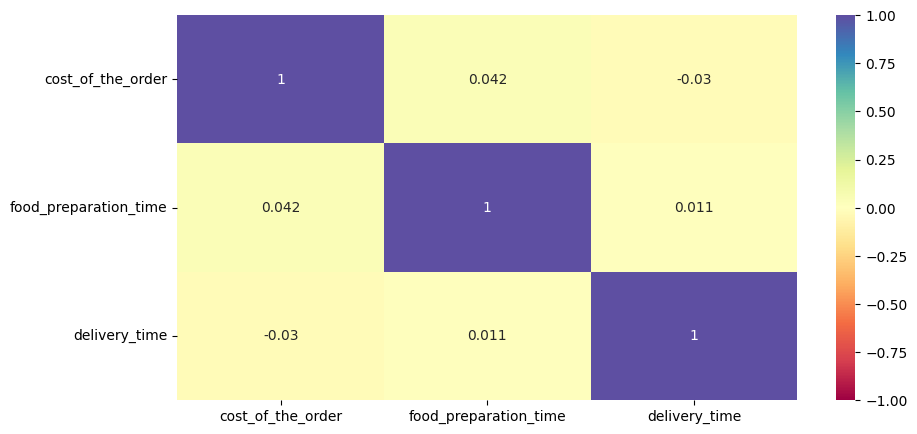

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

#### Observations:

* Looks like there is no correlation on numeric values.
  * In particular no correlation between cost and features like: delivery_time, food_preparetion_time.

**Let's check the correlation between numerical and categorical values.**

### Correlation between: **day, cuisine type**

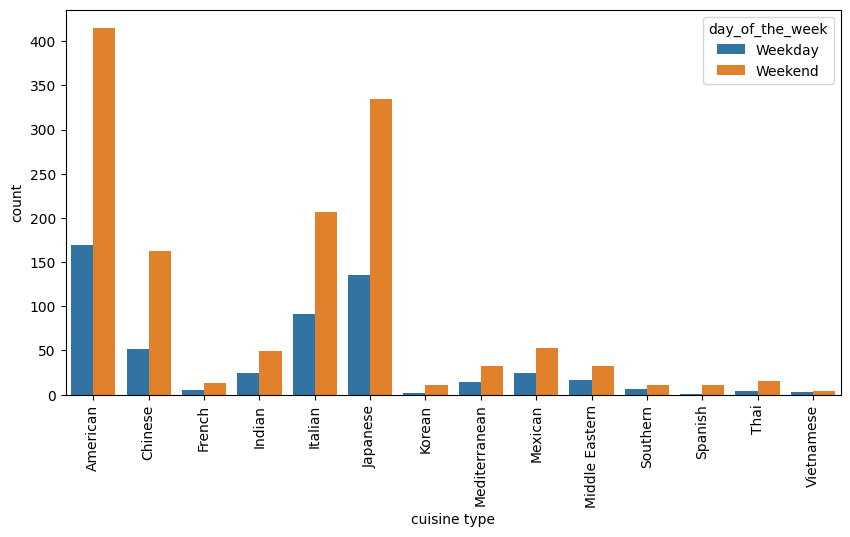

In [ ]:
# Show countplot for day and cuisine type
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='cuisine_type',hue='day_of_the_week')
plt.xticks(rotation=90)
plt.xlabel('cuisine type');

#### Observations:

* There is no correlation between a week day and a specific cuisine type.
  * All the cuisin types have more orders placed during the weekends.
* American and Japanese cuisine get most of the orders.

### Correlation between: **cost, day**

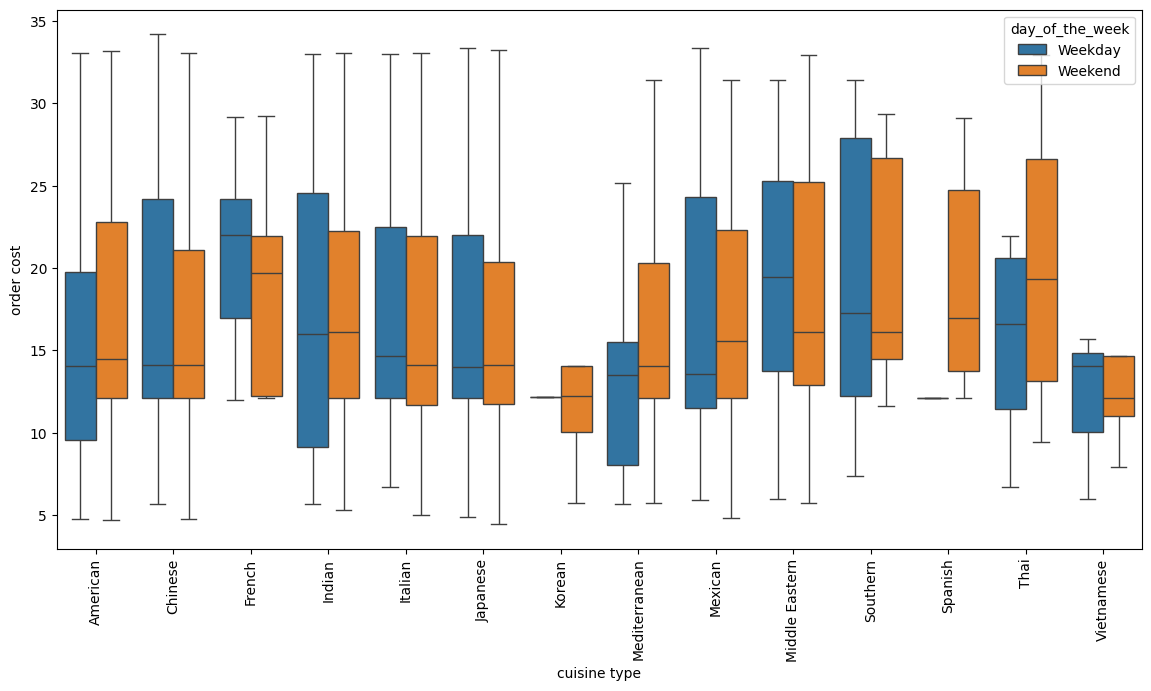

In [ ]:
# Show boxplot
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', hue = 'day_of_the_week',showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('cuisine type');
plt.ylabel('order cost');

#### Observations:

* For most types of cuisine the order cost is slightly higher during the weekdays.
* For American, Mediterranean, Spanish and Korean cuisine the cost is higher during the weekdays.

### Correlation between: **cuisine, food preparation time, day**

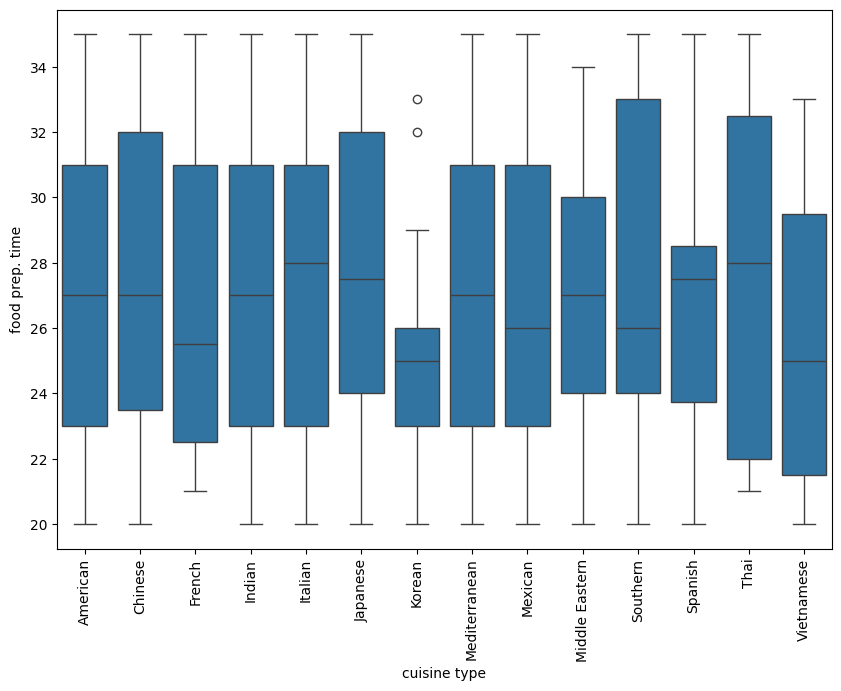

In [ ]:
# Show plot
plt.figure(figsize=(10,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.xticks(rotation=90)
plt.xlabel('cuisine type');
plt.ylabel('food prep. time');
plt.show()

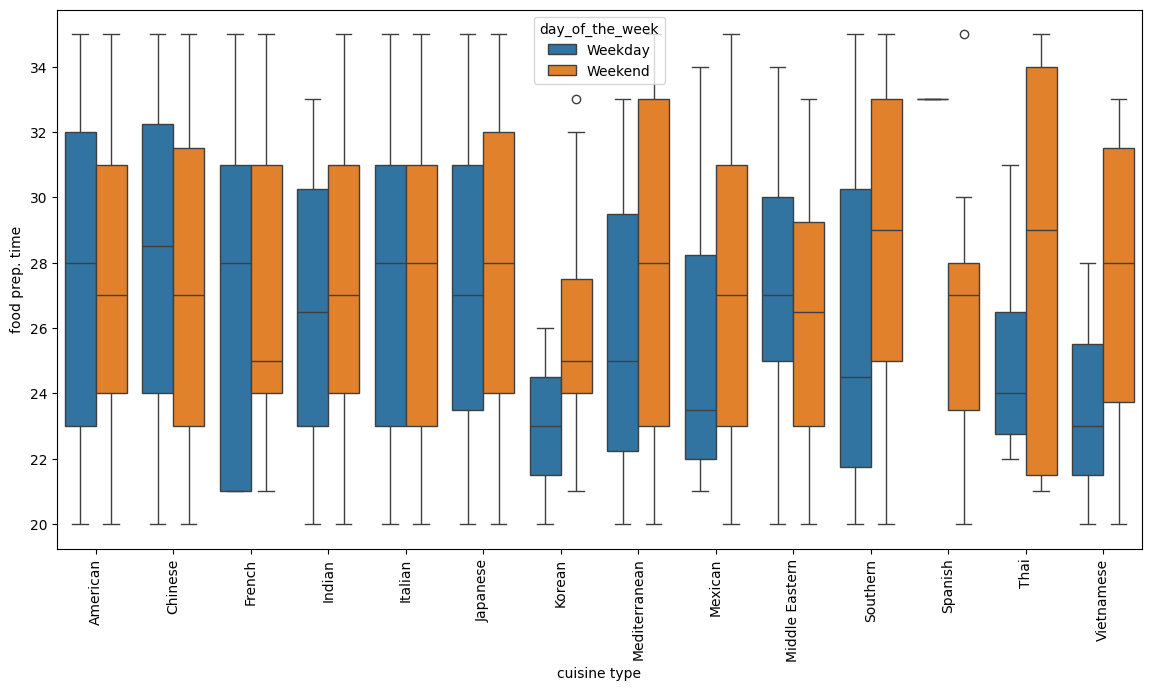

In [ ]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', hue = 'day_of_the_week')
plt.xticks(rotation=90)
plt.xlabel('cuisine type');
plt.ylabel('food prep. time');
plt.show()

#### Observations:

* For most types of cuisines the food preparation time is higher during the weekends.
* The only exception is American and Chinese cuisine.
* Korean and Spanish cuisine takes less time to make compared to the others, however need to remember that there is very little representation if this type of cuisine in this particular dataset as well as many outliers.

### Correlation between: **cuisine, rating**

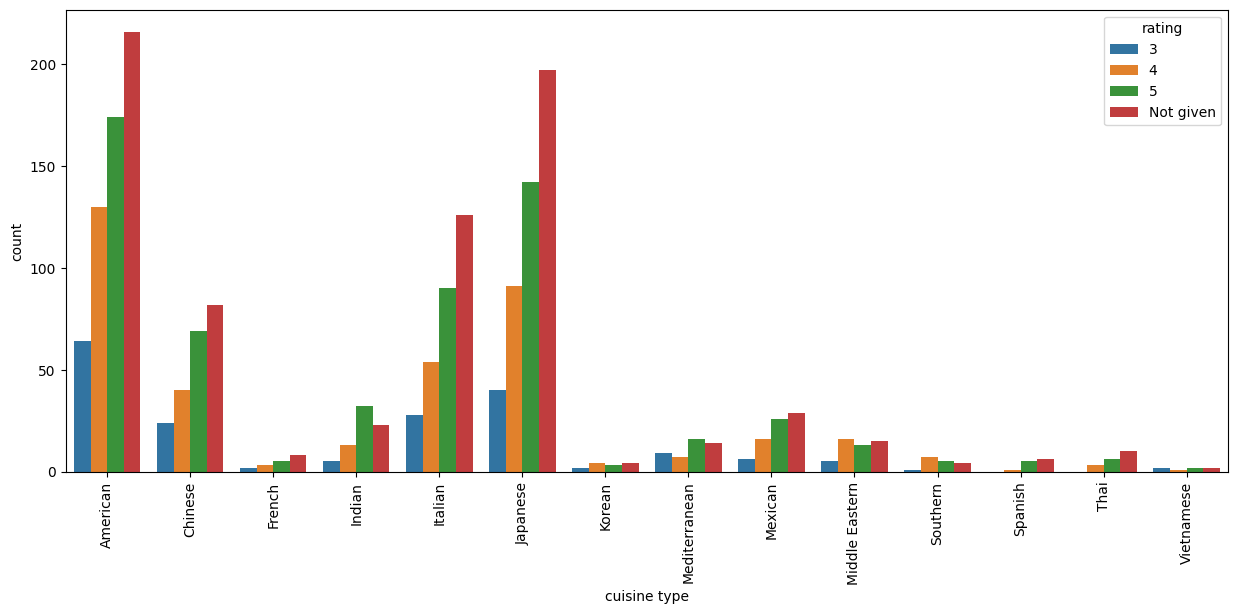

In [ ]:
# Show plot
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='cuisine_type',hue='rating')
plt.xticks(rotation=90)
plt.xlabel('cuisine type');

#### Observations:

* There is no particular correlation between the type of cuisine and the rating.
* For most of the cuisine types the rating is unknown.
* For Indian cuisine the percent of unknow ratings is smaller compared to other types of cuisine.

### Correlation between: **cuisin, price**

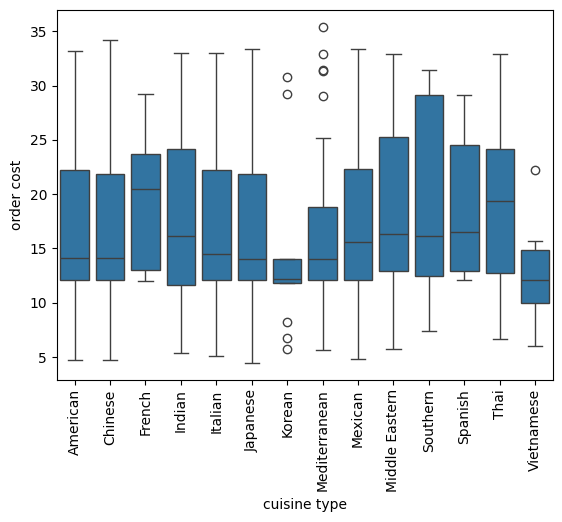

In [ ]:
# Show plot
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order') ;
plt.xticks(rotation=90)
plt.xlabel('cuisine type');
plt.ylabel('order cost');
plt.show()


#### Observations:

* Korean and Vietnamese cuisine tends to be cheaper, however, there are many outliers, and also this cuisine representation in the dataset is relatively small.
* We also saw earlier that the Korean type of cuisine is the one with the smallest preparation time.
* Southern cuisine tends to be more expansive, but also need to be aware that is has a small representation in a dataset.

### Correlation between: **delivery time, day**

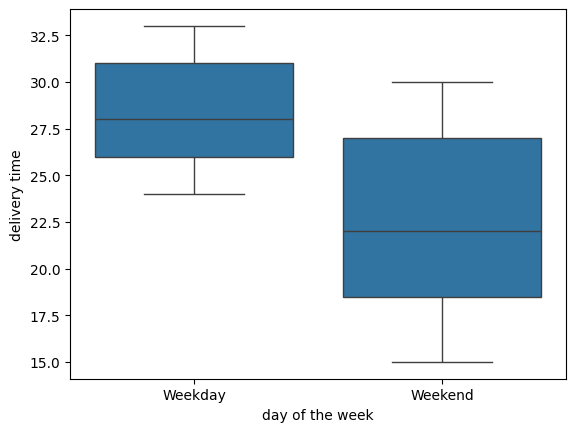

In [ ]:

# Show plot
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.xlabel('day of the week');
plt.ylabel('delivery time');
plt.show()

#### Observations:

* The delivery time during the weekend is faster compared to weekdays.

### Correlation between: **food preparation time, day**

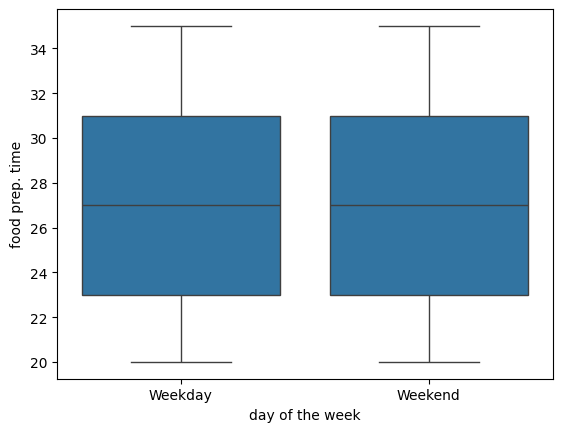

In [ ]:
# Show plot
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.xlabel('day of the week');
plt.ylabel('food prep. time');
plt.show()

#### Observations:

* No visible correlation between the day of the week and food preparation time. There is no significant difference in food preparation time during the different week days.

### Correlation between: **delivery time, rating**

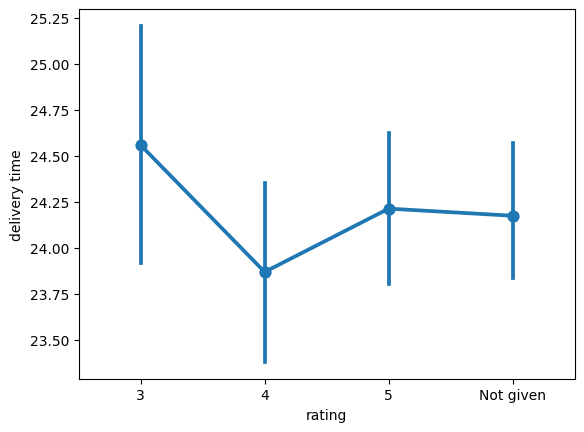

In [ ]:
# Show plot
sns.pointplot(x ='rating', y ='delivery_time', data = df)
plt.xlabel('rating');
plt.ylabel('delivery time');
plt.show()

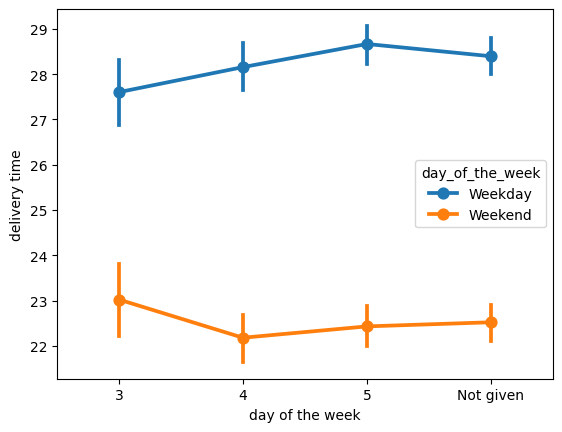

In [ ]:
# Show plot
sns.pointplot(x ='rating', y ='delivery_time', data = df, hue = 'day_of_the_week')
plt.xlabel('day of the week');
plt.ylabel('delivery time');
plt.show()

#### Observations:

* If the delivery time is high, there is a higher chance of getting a low rating (Especially during the Weekends).
* If we look at the different week days:
  * Weekdays: positive correlation between time and rating.
  * Weekdays: negative correlation between time and rating (expecially for ratings 3 and 4, 3 and 5)

### Correlation between: **food preparation time, rating**

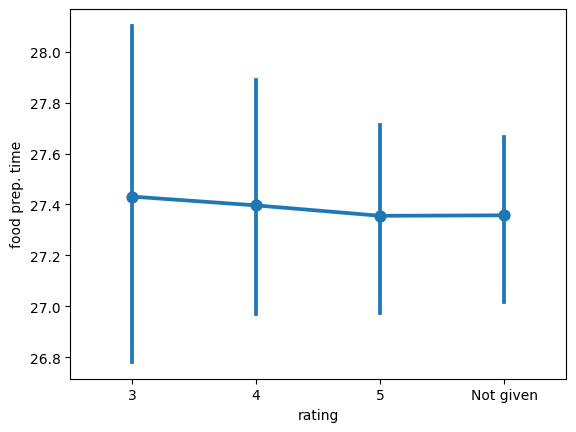

In [ ]:
# Show plot
sns.pointplot(x ='rating', y ='food_preparation_time', data = df)
plt.xlabel('rating');
plt.ylabel('food prep. time');
plt.show()

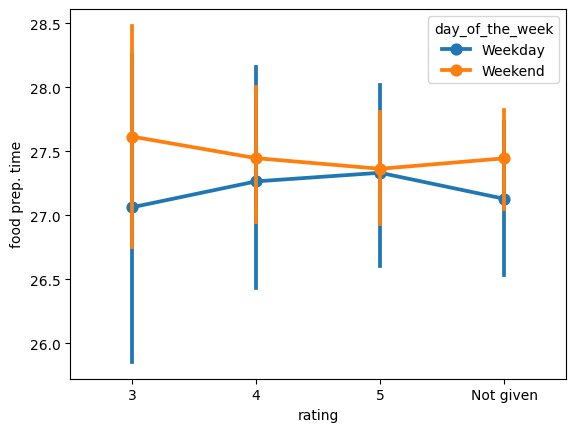

In [ ]:
# Show plot
sns.pointplot(x ='rating', y ='food_preparation_time', data = df, hue='day_of_the_week')
plt.xlabel('rating');
plt.ylabel('food prep. time');
plt.show()

#### Observations:

* Overall if the food preparation time is higher, the orders tend to get lower ratings.
* If we look at the different weekdays:
  * During weekends negative correlation between prep. time and rating.
  * During weekdays positive correlation between time and rating.

### Correlation between: **cost, rating**

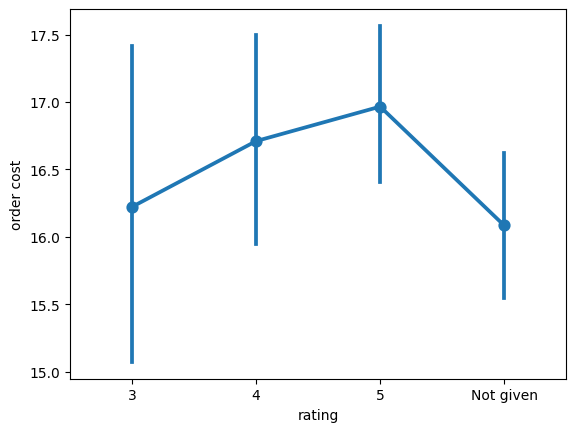

In [ ]:
# Show plot
sns.pointplot(x ='rating', y ='cost_of_the_order', data = df)
plt.xlabel('rating');
plt.ylabel('order cost');
plt.show()

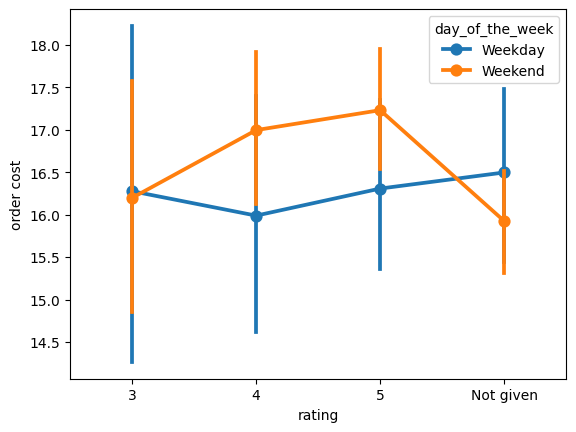

In [ ]:
# Show plot
sns.pointplot(x ='rating', y ='cost_of_the_order', data = df, hue='day_of_the_week')
plt.xlabel('rating');
plt.ylabel('order cost');
plt.show()

#### Observations:

* Overall positive correlation between cost of the order and rating. Especially during the Weekends.

The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# function to filter out the restorants answering promotion criteria
def filter_promoted_restorants(df):
  """ df: DataFrame provided
      function filters all the restorants that unswer the promotion criteria
      """

  # Filter all the orders with rating
  records_with_rating = df[df.rating != 'Not given'].copy()
  # Convert 'rating' column to object (string) data type, can't convert object datatype to int directly.
  records_with_rating['rating'] = records_with_rating['rating'].astype(str)
  # Convert 'rating' column to integers
  records_with_rating['rating'] = records_with_rating['rating'].astype(int)
  # Filter all the restorants that have more then 50 ratings
  more_then_50_ratings = records_with_rating.groupby('restaurant_name').filter(lambda x: len(x) > 50)
  # Filter all the restorants that have avarage rating more then 4
  promoted = more_then_50_ratings.groupby(['restaurant_name'])['rating'].mean() > 4
  print(promoted)

In [ ]:
# get promoted restorants
filter_promoted_restorants(df)

restaurant_name
Blue Ribbon Fried Chicken    True
Blue Ribbon Sushi            True
Shake Shack                  True
The Meatball Shop            True
Name: rating, dtype: bool


#### Observations:

* The promoted restaurants are:
  * Blue Ribbon Fried Chicken
  * Blue Ribbon Sushi
  * The Meatball Shop
  * Shake Shack
* Most of the restaurants that fall under the promotion criteria are the same restaurants as those that are most popular in terms of number of orders.

The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# calculate the profit on an order price
def calc_profit(order_cost):
  """
  This function will be applied on all the order prices
  to calculate the prosit for each order individually
  """
  if order_cost > 20 :
    return order_cost * 0.25
  elif order_cost > 5:
    return order_cost * 0.25
  else:
    return order_cost

In [ ]:
# calculate the total profit
def calc_total_profit(df):
  """
  This function calculates total profit size on all the orders
  """

  # create 'profit' column to contain the profit for each order
  df['profit'] = df.cost_of_the_order.apply(calc_profit)

  total_profit = 0

  for profit in df.profit:
    total_profit += profit

  return total_profit

In [ ]:
# print total profit
calc_total_profit(df)

7860.760000000015

#### Observations:

* The net profit of the company on all orders is 7860

The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Generate new column that holds the total time (delivery + preparation)
df['total_time'] = df['delivery_time'] + df['food_preparation_time']

In [ ]:
# Calculate what percent on the record have total time > 60
(df.total_time > 60).value_counts(normalize=True)

total_time
False    0.894626
True     0.105374
Name: proportion, dtype: float64

#### Observations:

* Approximately 10% of the orders take more than 60 minutes to deliver.

The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Group all the orders by Week days and calculate the mean for each group
df.groupby(['day_of_the_week'])['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

* It takes less time to prepare the food on Weekends 22, compared to 28 on Weekdays.
* It is surprising because from what we saw earlier, there are more orders placed during the weekend.

### Conclusion and Recommendations

What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:
*  Most of the orders are placed during the weekends.
*  Most popular cuisines are
  * American
  * Japanese
  * Italian
  * Chinese

    * Few other cuisines get less than 2% of the orders.
* Delivery time during the weekends is faster.
* About 38% of orders are not rated.
* High delivery time can negatively affect the ratings.
* High preparation time can negatively affect the rating.
* Usually orders with higher costs get higher ratings.
* There are cuisines with significantly short preparation times like Korean and Vietnamese. For these cuisines, the order costs are also relatively smaller.
   

### Recommendations:

*  Ensure fast delivery time, especially during the weekdays when delivery times are longer, this will help to get more positive ratings.
* Ensure fast food preparation time, especially during the weekends, when the ratings are mostly affected by preparation time.
* Try to increase order costs (by offering additional services and benefits) as those orders are getting a higher rating and bring more profit.
* Consider gathering more data on ratings, as this can draw more insights into the business decisions.
* Consider gathering more data on different types of cuisines, especially those with very little representation as this can draw more accurate business decisions.

---